# Loading the dataset

## Load the data

- This dataset comes from kaggle(website) -> compete -> House Prices: Advanced Regression Techniques
  
  Link:https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

### (1) read data-description

In [1]:
import pandas as pd

des_url = '/Users/cao.yumin/Desktop/S12020-pythonA:B/pythonB/data_description.txt'
descrip = open(des_url)
content = descrip.read()
print(content)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [2]:
# description_url = 'https://storage.googleapis.com/kagglesdsdata/competitions/5407/868283/data_description.txt?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1591375654&Signature=mrnuo8bf3EZIzVb2niN7szOBPK136wP3hTO1yxeS3tfJ69YrON1R2WDLSDoe8IQp03DbO%2For6YpcBlxDIViZFglHQOXh4EnTTg5ItKnjldhBvKVpiFk8'

In [3]:
# import requests

# response = requests.get(description_url)
# data = response.text
# print(data)

### (2) read csv file into pandas frame

In [4]:
# url = 'https://storage.googleapis.com/kagglesdsdata/competitions/5407/868283/train.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1591375675&Signature=L1DaZnhwsICTiVv6NQWp9RwVjGndWncua%2BaWrVO7zwPsVxUphFL1rplazA%2FW3kvRqydwXsCCRMpofqnoA56Nyaj8FbhYYwOYq8b27NckZGO2QOqAGCmckjMzU41BA'

In [5]:
url = '/Users/cao.yumin/Desktop/S12020-pythonA:B/pythonB/train.csv'

In [6]:
import pandas as pd

df = pd.read_csv(url)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
df.shape

(1460, 81)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
# check duplicated rows
print(sum(df.duplicated(keep='first')==False))

1460


# Pre-processing the data

##    - clean the data: NAN

### (1) data with a lots of NAN

In [11]:
# drop the columns with plenty of NANs
df.dropna(thresh=1000,axis=1,inplace=True)

### (2) data with some NAN

* It can be seen that only LotFrontage lacks 200+ data, and it is a waste to abandon 200+ data because the total number is 1460, so we need to substitute these NANs of LotFrontage.

In [12]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

### (3) data with rare NAN

* These NANs are rare, so it can be removed directly.

In [13]:
df.dropna(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1338 non-null   int64  
 1   MSSubClass     1338 non-null   int64  
 2   MSZoning       1338 non-null   object 
 3   LotFrontage    1338 non-null   float64
 4   LotArea        1338 non-null   int64  
 5   Street         1338 non-null   object 
 6   LotShape       1338 non-null   object 
 7   LandContour    1338 non-null   object 
 8   Utilities      1338 non-null   object 
 9   LotConfig      1338 non-null   object 
 10  LandSlope      1338 non-null   object 
 11  Neighborhood   1338 non-null   object 
 12  Condition1     1338 non-null   object 
 13  Condition2     1338 non-null   object 
 14  BldgType       1338 non-null   object 
 15  HouseStyle     1338 non-null   object 
 16  OverallQual    1338 non-null   int64  
 17  OverallCond    1338 non-null   int64  
 18  YearBuil

##    - clean the data: outliers

* I have been thinking about whether categorical variables need to remove the outliers, and here is an article explaining why categorical variables do not need to handle with outliers. So, I only focus on the columns with numeric dtype.

    Reference: Kirk Haslbeck, https://medium.com/owl-analytics/categorical-outliers-dont-exist-8f4e82070cb2

* During the processing of finding outliers, I found that some variables like 3SsnPorch(three season porch area in square feet) are inefficient because almost all of its values are zero(0). As a result, these variables will be evaluated to see whether they need to be removed.

    Reference: Grace, https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/

* Some variables like FullBath only have values 0 and 1, these values can be seen as dummy variables and do not need to change. However, if the number of 0 and 1 are extremely unbalanced, then we need to drop that column because that variable may has little contribute to the prediction.

    Reference: University of Southampton,\
    https://www.southampton.ac.uk/passs/gcse_scores/multivariate_analysis/linear_regression.page

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

{'Id': 0, 'MSSubClass': 1, 'LotFrontage': 3, 'LotArea': 4, 'OverallQual': 16, 'OverallCond': 17, 'YearBuilt': 18, 'YearRemodAdd': 19, 'MasVnrArea': 25, 'BsmtFinSF1': 33, 'BsmtFinSF2': 35, 'BsmtUnfSF': 36, 'TotalBsmtSF': 37, '1stFlrSF': 42, '2ndFlrSF': 43, 'LowQualFinSF': 44, 'GrLivArea': 45, 'BsmtFullBath': 46, 'BsmtHalfBath': 47, 'FullBath': 48, 'HalfBath': 49, 'BedroomAbvGr': 50, 'KitchenAbvGr': 51, 'TotRmsAbvGrd': 53, 'Fireplaces': 55, 'GarageYrBlt': 57, 'GarageCars': 59, 'GarageArea': 60, 'WoodDeckSF': 64, 'OpenPorchSF': 65, 'EnclosedPorch': 66, '3SsnPorch': 67, 'ScreenPorch': 68, 'PoolArea': 69, 'MiscVal': 70, 'MoSold': 71, 'YrSold': 72, 'SalePrice': 75} 38


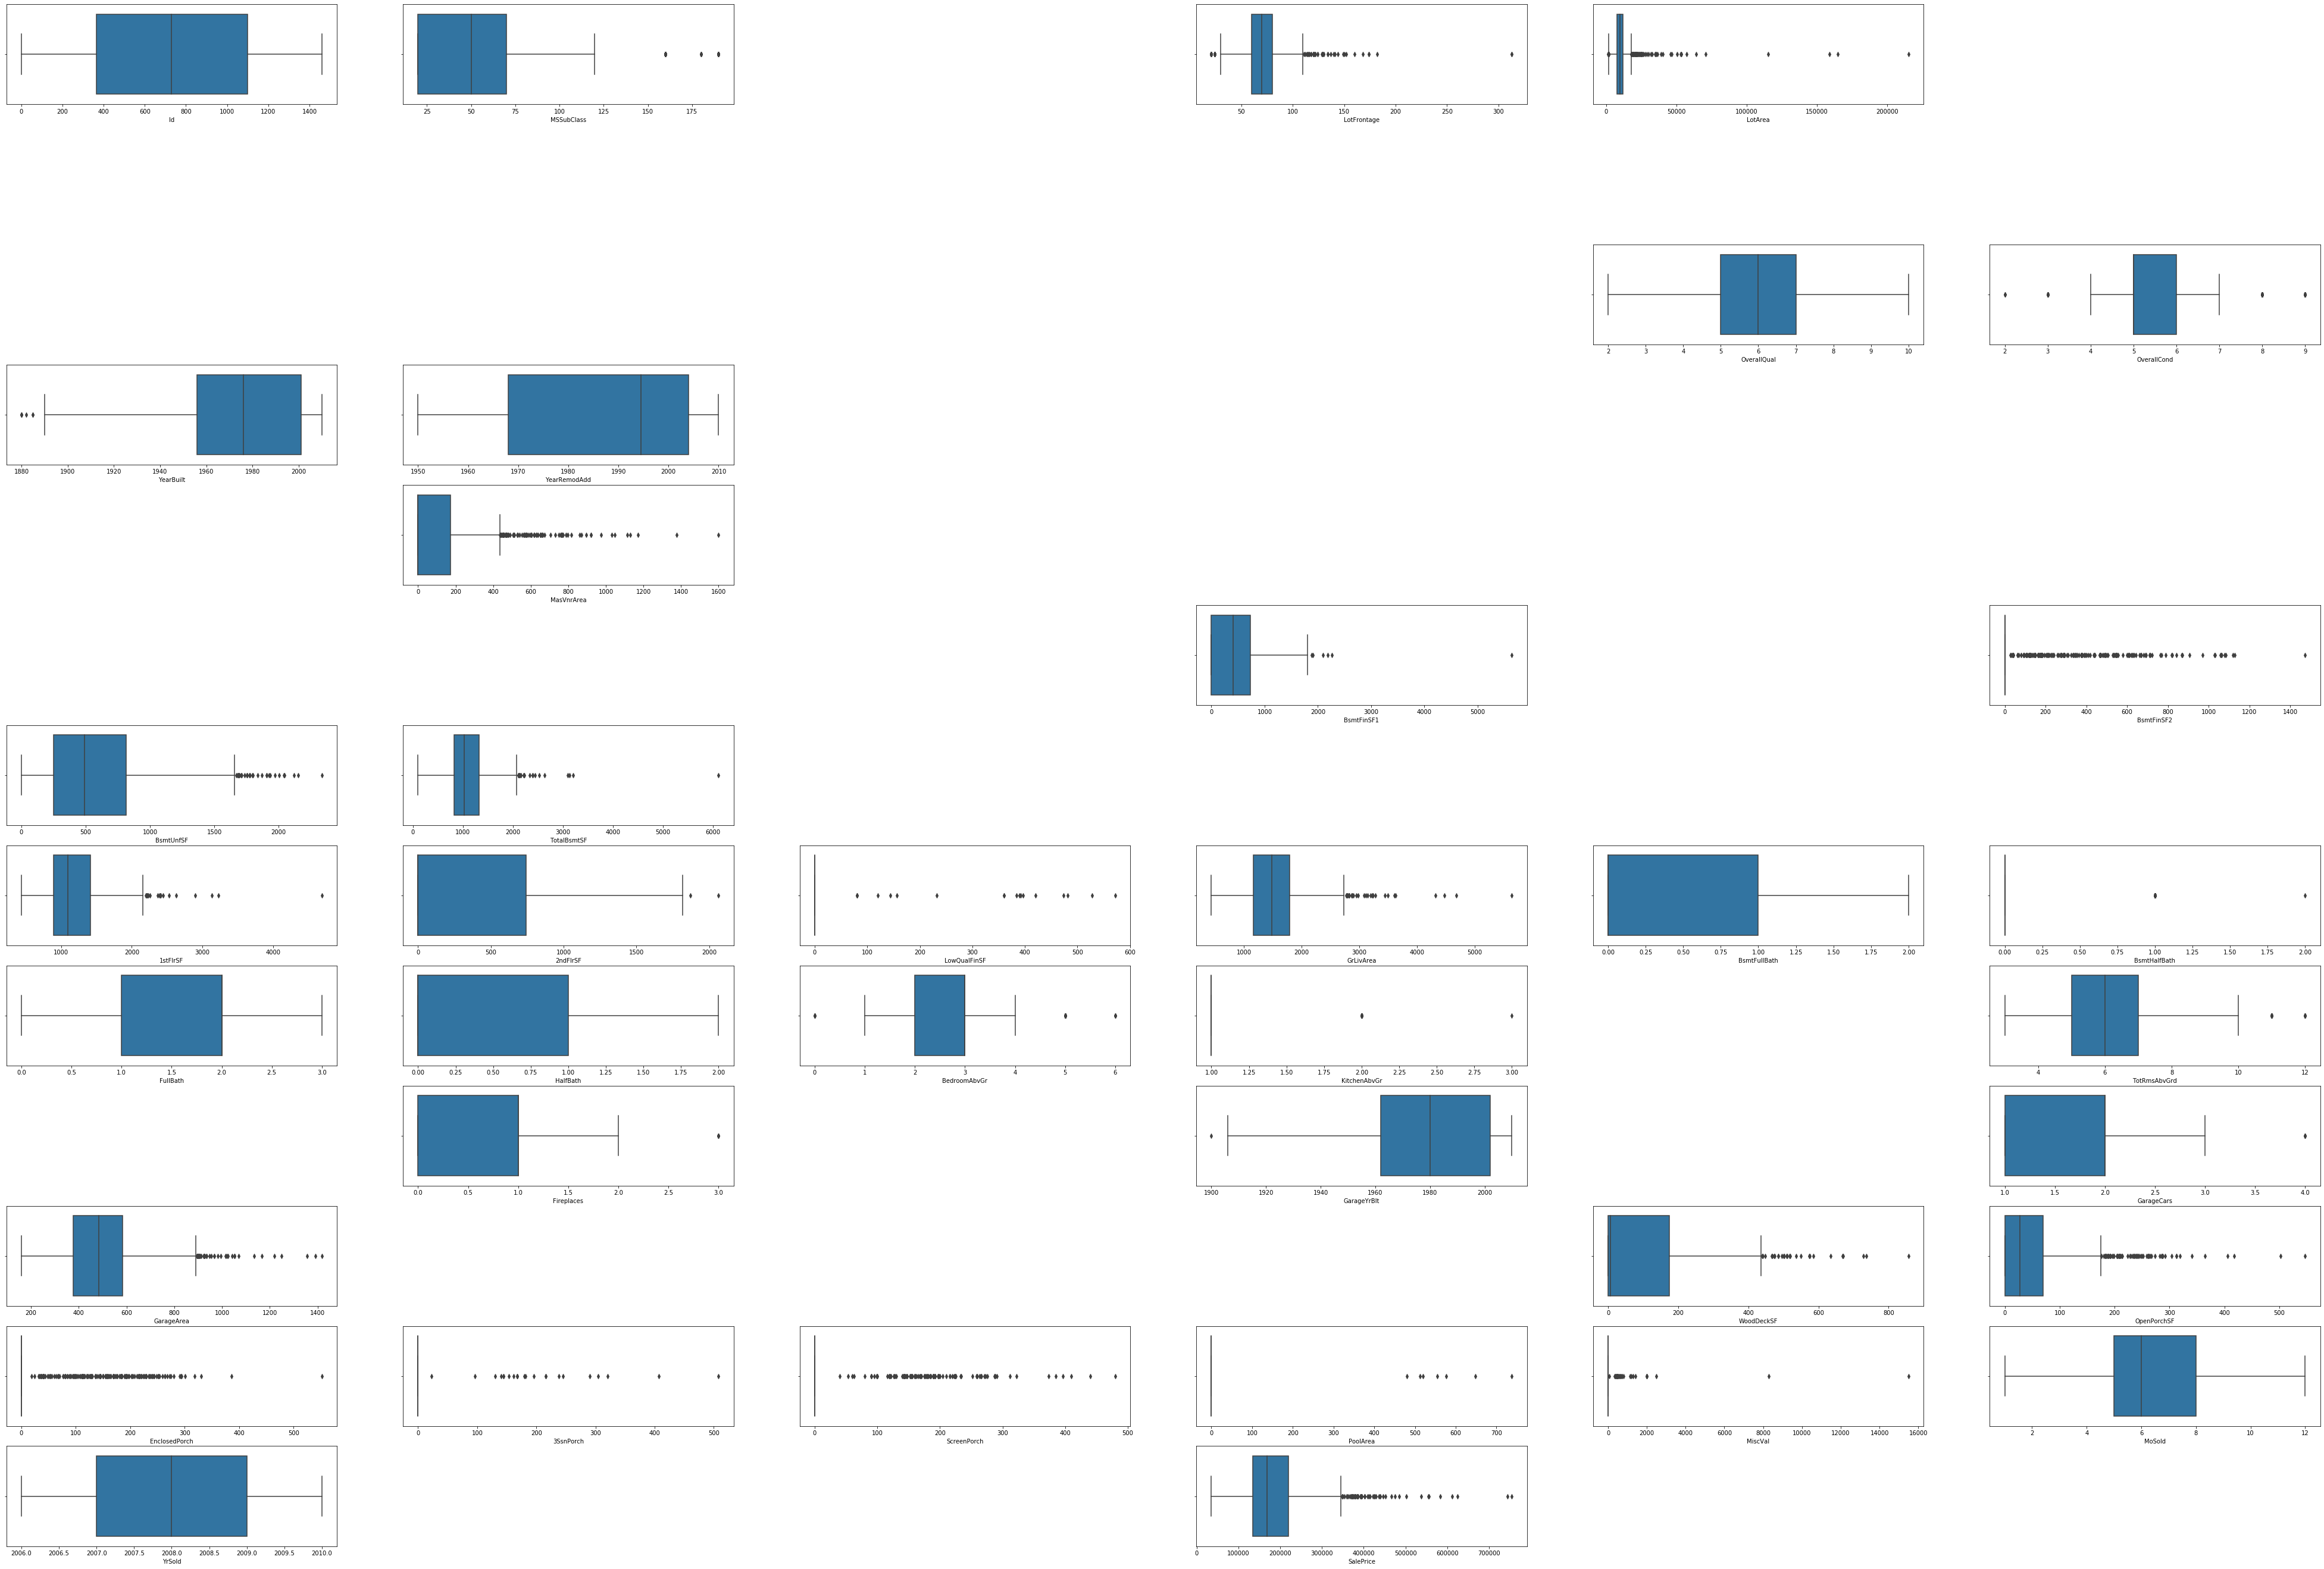

In [16]:
%matplotlib inline
# save the numeric columns' name and its index
temp_dic = {}
for i in range(len(df.columns)):
    if df[df.columns[i]].dtypes in ['int64','float64']:
        temp_dic[df.columns[i]]=i
print(temp_dic,len(temp_dic))

f,a = plt.subplots(13,6)
a = a.ravel()
f.subplots_adjust(left=0, bottom=0, right=9, top=9)


for iax,ax in enumerate(a):
#     print(iax)
    if iax in temp_dic.values():
        sns.boxplot(x=df.iloc[:,iax],ax=ax)
    else:
        f.delaxes(ax)
        continue
plt.show()

# for i in temp_list:
#     sns.boxplot(x=df[i])
#     plt.show()

<Figure size 4608x4608 with 0 Axes>

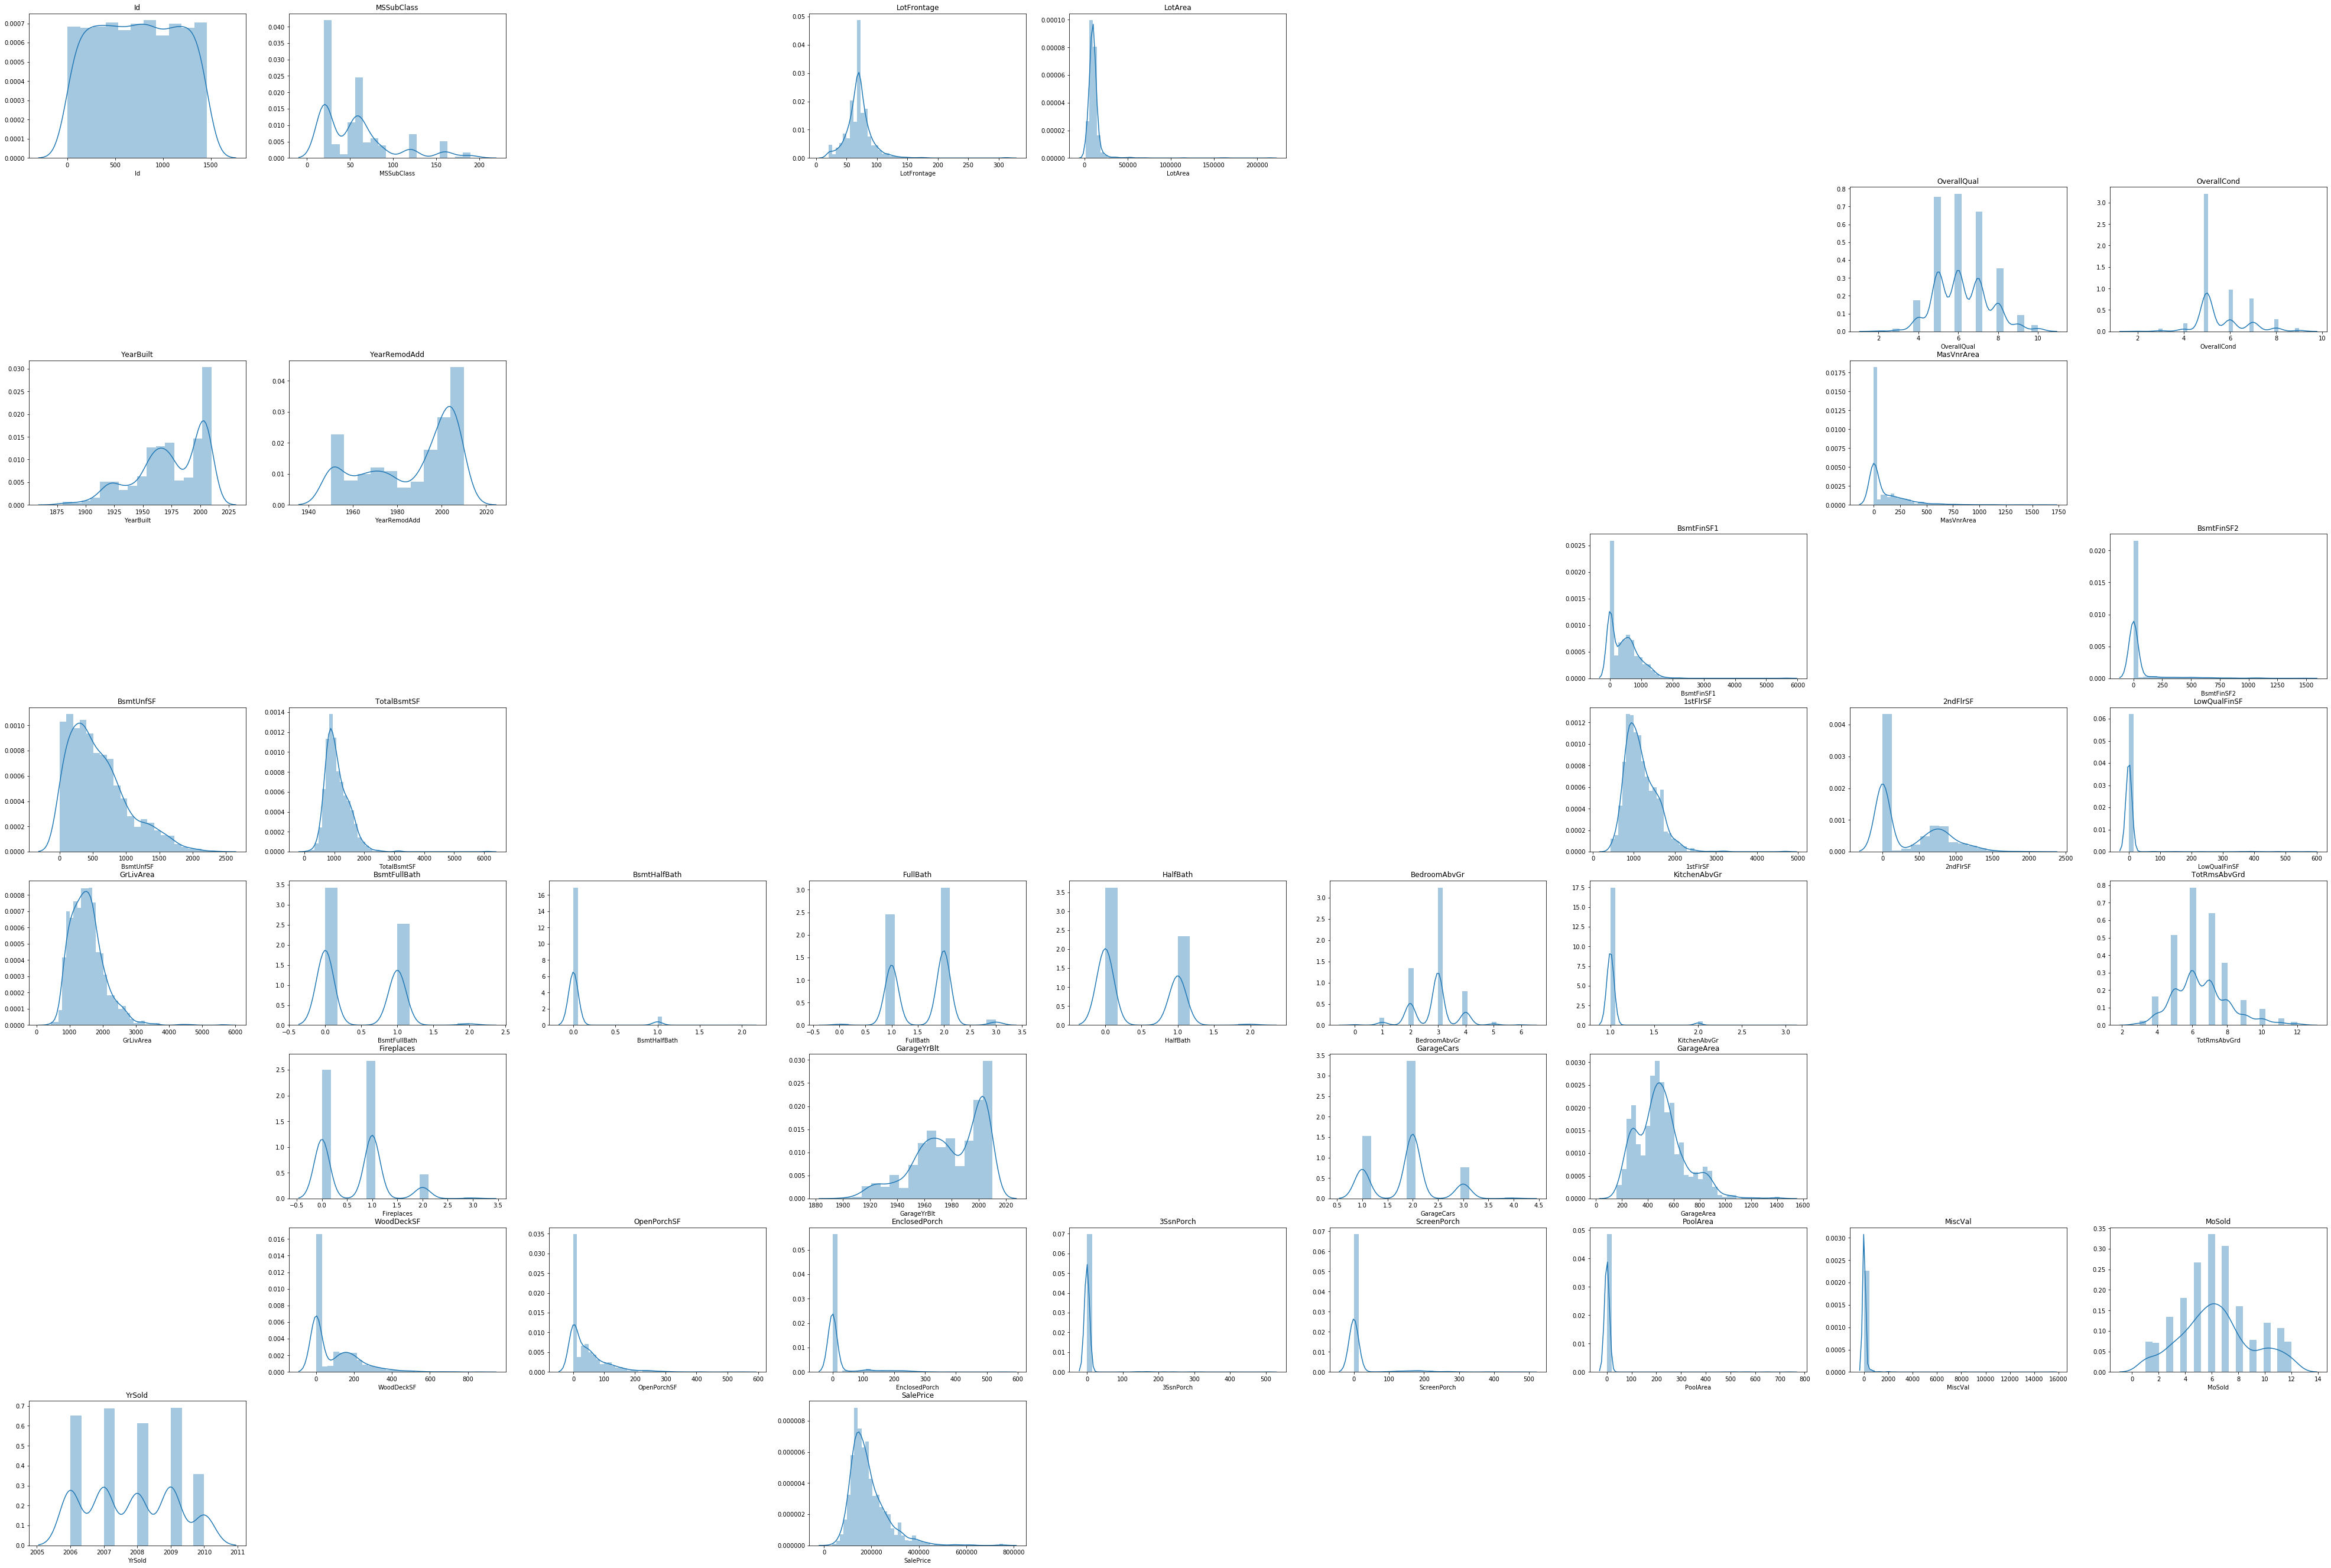

In [17]:
plt.figure(figsize=(64,64))
f,a = plt.subplots(9,9)
f.subplots_adjust(left=0, bottom=0, right=9, top=9)
a = a.ravel()
for idx,ax in enumerate(a):
    if idx in temp_dic.values():
        sns.distplot(df.iloc[:,idx],ax=ax)
        ax.set_title(df.columns[idx])
    else:
        f.delaxes(ax)
        continue
plt.show()

## Analysis

There are some articles about whether all outliers should be removed when following the rules of normal distribution. In academia, there is only one rule for taking out "outliers": if the value is physically / physiologically impossible. Deleting the outliers is complicated. In my project I would prefer to delete them cautiously because the size of my training data is small. If I remove every outliers in each column, then the total removal influence may becomes huge. 

Through seeing the seaborn boxplot, my point is that if some outliers have low density - usually an isolated point and far from the confidence interval, which is also far away from the other high-density outliers, then I would probably delete them for a better prediction. 

For instance, in the seaborn plot of MasVnrArea, we can see that there are still lots of points at the outside of the blue area, but we can't delete them all just because they don't follow the normal distribution rules. Some of these outliers are high-density points, and they are important because they have the real-world meaning and even may pass the important information that could have influence on our prediction. So, in this example, if the points are far away from the blue box and have low-density, then I will remove them, otherwise, I will keep them for a better prediction.

* Id: Id is just a series of number without real meaning, so it has no attribute to prediction.
* MssubClass: Identifies the type of dwelling involved in the sale. Remove the values above 150.
* LotFrontage: Linear feet of street connected to property. We can remove the value bigger than 300 through observation.
* LotArea: Lot size in square feet. It is easy to find that the outliers of LotArea are large and can affect the    results significantly. I choose to drop the value beyond 100000, because these selected points are few but can affect results. What's more, the area value bigger than 100000 is not easy to see in normal life, which means these points are not representative.
* OverallQual: Both the histogram and seaborn plots look perfect. No need to drop.
* OverallCond: If we smooth the kdeplot then we will find it looks like a normal distribution. No need to drop.
* YearBuilt: Remove the values before 1900.
* YearRemodAdd: Remodel date. No need to drop.
* MasVnrArea: Masonry veneer area in square feet. I decided to drop the value bigger than 1000, because the density of points bigger than 1000 is low, and these points may affect results significantly.
* BsmtFinSF1: Remove values bigger than 2000.
* BsmtFinSF2: Almost all the values are zero, and therefore we can remove this variable.
* BsmtUnfSF: Remove values bigger than 2000, considering the density of points and affection.
* TotalBsmtSF: Remove values bigger than 3000, considering the density of points and affection.
* 1stFirSF: Remove values bigger than 3000.
* 2ndFirSF: Remove values bigger than 1800.
* LowQualFinSF: Remove the columns due to its inefficient values.
* GrlivArea: Remove values bigger than 4000.
* BsmtFullBath: No need to remove.
* BsmtHalfBath: Remove the columns due to its inefficient values.
* FullBath: No need to remove.
* HalfBath: No need to remove.
* BedroomAbvGr: Remove the values that equal to 0,5,6.
* KitchenAbvGr: Remove the column due to its' values are almost all equal to 1, which is inefficient.
* TotRmsAbvGrd: Remove the values that bigger than 10 after observation.
* Fireplaces: Remove the values that bigger than 3.
* GarageYrBit: Year garage was built. Remove the values smaller than 1920.
* GarageCars: Remove the values bigger than 3.
* GarageArea: Remove the values that bigger than 1200.
* WoodDeckSF: Remove the values bigger than 600.
* OpenPorchSF: Remove the values bigger than 350.
* EnclosedPorch: Remove the column due to its inefficient values.
* 3SsnPorch: Remove the column.
* ScreenPorch: Remove the column.
* PoolArea: Remove the column.
* MiscVal: Remove the column.
* MoSold: No need to change.
* YrSold: No need to change.

In [18]:
# Have a look at the detail of columns that prepare to delete.
drop_columns = ['Id','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
for i in drop_columns:
    if i != 'Id':
        print(df[i].value_counts())

0       1176
180        5
374        3
712        2
93         2
        ... 
532        1
544        1
546        1
547        1
1474       1
Name: BsmtFinSF2, Length: 141, dtype: int64
0      1320
80        3
360       2
572       1
528       1
481       1
473       1
420       1
397       1
392       1
390       1
384       1
232       1
156       1
144       1
120       1
Name: LowQualFinSF, dtype: int64
0    1258
1      79
2       1
Name: BsmtHalfBath, dtype: int64
1    1299
2      38
3       1
Name: KitchenAbvGr, dtype: int64
0      1155
112      15
96        5
192       5
216       5
       ... 
242       1
123       1
248       1
198       1
552       1
Name: EnclosedPorch, Length: 109, dtype: int64
0      1315
168       3
144       2
216       2
23        1
96        1
130       1
140       1
153       1
162       1
508       1
407       1
182       1
196       1
238       1
245       1
290       1
304       1
320       1
180       1
Name: 3SsnPorch, dtype: int64
0      1222
1

In [19]:
# During the outliers-finding processing, some columns were found inefficient and need to be removed.
df.drop(drop_columns,axis=1,inplace=True)

# Clean the outliers.
df.rename(columns={"1stFlrSF": "FirstFirSF", "2ndFlrSF": "SecondFirSF"},inplace=True)
df_clean = df[(df.MSSubClass <= 150) & (df.LotFrontage <= 300) & (df.LotArea <= 100000)\
             & (df.YearBuilt >= 1900) & (df.MasVnrArea <= 1000) & (df.BsmtFinSF1 <= 2000)\
             & (df.BsmtUnfSF <= 2000) & (df.TotalBsmtSF <= 3000) & (df.FirstFirSF <= 3000)\
             & (df.SecondFirSF <= 1800) & (df.GrLivArea <= 4000) & (df.BedroomAbvGr != 0)\
             & (df.BedroomAbvGr != 5) & (df.BedroomAbvGr != 6) & (df.TotRmsAbvGrd <= 10)\
             & (df.Fireplaces <= 3) & (df.GarageYrBlt >= 1920) & (df.GarageCars <= 3)\
             & (df.GarageArea <= 1200) & (df.WoodDeckSF <= 600) & (df.OpenPorchSF <= 350)]

In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1157 entries, 0 to 1458
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1157 non-null   int64  
 1   MSZoning       1157 non-null   object 
 2   LotFrontage    1157 non-null   float64
 3   LotArea        1157 non-null   int64  
 4   Street         1157 non-null   object 
 5   LotShape       1157 non-null   object 
 6   LandContour    1157 non-null   object 
 7   Utilities      1157 non-null   object 
 8   LotConfig      1157 non-null   object 
 9   LandSlope      1157 non-null   object 
 10  Neighborhood   1157 non-null   object 
 11  Condition1     1157 non-null   object 
 12  Condition2     1157 non-null   object 
 13  BldgType       1157 non-null   object 
 14  HouseStyle     1157 non-null   object 
 15  OverallQual    1157 non-null   int64  
 16  OverallCond    1157 non-null   int64  
 17  YearBuilt      1157 non-null   int64  
 18  YearRemo

##    - categorical variables

* Some attributes are important, such as 'Street'. It is known that a house located in the CBD street may has higher price. However, these attributes'types are 'object', so we need to handle these categorical variables.

In [21]:
obj_dic = {}
for i in range(len(df_clean.columns)):
    if df_clean[df_clean.columns[i]].dtypes == 'object':
        obj_dic[df_clean.columns[i]]=i
print(obj_dic,len(obj_dic))

{'MSZoning': 1, 'Street': 4, 'LotShape': 5, 'LandContour': 6, 'Utilities': 7, 'LotConfig': 8, 'LandSlope': 9, 'Neighborhood': 10, 'Condition1': 11, 'Condition2': 12, 'BldgType': 13, 'HouseStyle': 14, 'RoofStyle': 19, 'RoofMatl': 20, 'Exterior1st': 21, 'Exterior2nd': 22, 'MasVnrType': 23, 'ExterQual': 25, 'ExterCond': 26, 'Foundation': 27, 'BsmtQual': 28, 'BsmtCond': 29, 'BsmtExposure': 30, 'BsmtFinType1': 31, 'BsmtFinType2': 33, 'Heating': 36, 'HeatingQC': 37, 'CentralAir': 38, 'Electrical': 39, 'KitchenQual': 47, 'Functional': 49, 'GarageType': 51, 'GarageFinish': 53, 'GarageQual': 56, 'GarageCond': 57, 'PavedDrive': 58, 'SaleType': 63, 'SaleCondition': 64} 38


* For those objects with ordering, like 
  LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
  we can translate it into numeric type with setting Reg=0, IR1=1,IR2=2,IR3=3.
* For those objects without ordering, we can translate them into dummy variables.
  
  Reference: Chris, Guide to Encoding Categorical Values in Python, https://pbpython.com/categorical-encoding.html

### (1) Replace the ordered objects which have inner ordering with numeric.

In [22]:
# Find the documentation at very beginning to see whether an object variable has order.
cleanup_nums = {"LotShape": {"Reg":0, "IR1":1, "IR2":2, "IR3":3},
                "LandContour": {"Lvl":0, "Bnk":1, "HLS":2, "Low":3},
                "LandSlope": {"Gtl":0, "Mod":1, "Sev":2},
                "ExterQual": {"Po":0, "Fa":1, "TA":2, "Gd":3, "Ex":4},
                "ExterCond": {"Po":0, "Fa":1, "TA":2, "Gd":3, "Ex":4},
                "BsmtQual": {"Po":0, "Fa":1, "TA":2, "Gd":3, "Ex":4},
                "BsmtCond": {"Po":0, "Fa":1, "TA":2, "Gd":3, "Ex":4},
                "BsmtExposure": {"No":0, "Mn":1, "Av":2, "Gd":3},
                "BsmtFinType1": {"Unf":0, "LwQ":1, "Rec":2, "BLQ":3, "ALQ":4, "GLQ":5},
                "BsmtFinType2": {"Unf":0, "LwQ":1, "Rec":2, "BLQ":3, "ALQ":4, "GLQ":5},
                "HeatingQC": {"Po":0, "Fa":1, "TA":2, "Gd":3, "Ex":4},
                "KitchenQual": {"Po":0, "Fa":1, "TA":2, "Gd":3, "Ex":4},
                "GarageFinish": {"Unf":0, "RFn":1, "Fin":1},
                "GarageQual": {"Po":0, "Fa":1, "TA":2, "Gd":3, "Ex":4},
                "GarageCond": {"Po":0, "Fa":1, "TA":2, "Gd":3, "Ex":4}}
obj_df = df_clean.replace(cleanup_nums)

In [23]:
obj_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,0,0,AllPub,Inside,0,...,2,2,Y,0,61,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,0,0,AllPub,FR2,0,...,2,2,Y,298,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,1,0,AllPub,Inside,0,...,2,2,Y,0,42,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,1,0,AllPub,Corner,0,...,2,2,Y,0,35,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,1,0,AllPub,FR2,0,...,2,2,Y,192,84,12,2008,WD,Normal,250000


### (2) Transfer the unordered categorical variables into dummy variables

In [24]:
dummy_list = [i for i in obj_dic if i not in cleanup_nums]

In [25]:
dummy_list

['MSZoning',
 'Street',
 'Utilities',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageType',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [26]:
final_df = pd.get_dummies(obj_df, columns=dummy_list)

In [27]:
final_df.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,0,0,0,7,5,2003,2003,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,0,0,0,6,8,1976,1976,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,1,0,0,7,5,2001,2002,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,1,0,0,7,5,1915,1970,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,1,0,0,8,5,2000,2000,...,0,0,0,1,0,0,0,0,1,0


##    - feature selection

* It is impossible to plot the seaborn heatmap directly, because there are too many features. Therefore, fliter the features before plotting is important.

  Reference: Rumsey, How to Interpret a Correlation Coefficient r,      https://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/

In [28]:
final_df.corr()

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
MSSubClass,1.000000,-0.239282,-0.209906,0.013725,0.023715,0.006973,0.204908,-0.078257,0.142462,0.128288,...,0.050339,-0.022042,-0.027283,0.018915,-0.021935,0.002534,0.023487,0.006451,0.030648,-0.030264
LotFrontage,-0.239282,1.000000,0.293852,0.095928,0.016810,0.004360,0.194486,-0.086582,0.194891,0.080531,...,-0.074761,0.101076,-0.000881,-0.077828,-0.024194,-0.019224,-0.022106,0.034683,-0.064011,0.098388
LotArea,-0.209906,0.293852,1.000000,0.305582,0.273759,0.315265,0.093327,-0.034223,0.060748,0.008147,...,-0.020948,0.015738,-0.005588,-0.007550,-0.026343,-0.012753,0.005638,-0.008056,0.002079,0.023138
LotShape,0.013725,0.095928,0.305582,1.000000,0.166171,0.078656,0.163296,-0.070244,0.260202,0.177251,...,0.019812,0.026346,-0.022047,-0.009401,-0.015960,-0.022047,-0.026889,-0.012952,0.002436,0.024331
LandContour,0.023715,0.016810,0.273759,0.166171,1.000000,0.580770,0.020746,-0.001226,-0.034738,-0.022583,...,-0.014925,0.017684,-0.008610,0.006813,-0.007746,-0.008610,0.093977,-0.009216,-0.030952,0.030548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,0.002534,-0.019224,-0.012753,-0.022047,-0.008610,-0.006684,-0.027729,0.010941,-0.035989,-0.051472,...,-0.001500,-0.008947,-0.000865,0.011351,-0.007577,1.000000,-0.001938,-0.003483,-0.065327,-0.009096
SaleCondition_Alloca,0.023487,-0.022106,0.005638,-0.026889,0.093977,0.088448,-0.030911,0.024508,-0.048467,-0.021765,...,-0.003359,-0.020041,-0.001938,0.025427,-0.016971,-0.001938,1.000000,-0.007801,-0.146329,-0.020375
SaleCondition_Family,0.006451,0.034683,-0.008056,-0.012952,-0.009216,0.002134,-0.041542,-0.033300,-0.049835,-0.044194,...,-0.006038,-0.036023,-0.003483,0.045703,-0.030505,-0.003483,-0.007801,1.000000,-0.263019,-0.036622
SaleCondition_Normal,0.030648,-0.064011,0.002079,0.002436,-0.030952,-0.024536,-0.136818,0.161570,-0.170034,-0.109982,...,0.022956,-0.675671,-0.065327,0.664784,-0.572165,-0.065327,-0.146329,-0.263019,1.000000,-0.686909


In [29]:
corr_matriex = final_df.corr()
sale_corr = corr_matriex['SalePrice'][(corr_matriex.SalePrice <= -0.3) | (corr_matriex.SalePrice >= 0.3)]
print('Length of sale_corr:',len(sale_corr))
sale_corr

Length of sale_corr: 36


OverallQual              0.806163
YearBuilt                0.609622
YearRemodAdd             0.545861
MasVnrArea               0.484438
ExterQual                0.695684
BsmtQual                 0.682817
BsmtExposure             0.327005
BsmtFinType1             0.302690
BsmtFinSF1               0.379597
TotalBsmtSF              0.615826
HeatingQC                0.433941
FirstFirSF               0.598220
GrLivArea                0.740428
FullBath                 0.583562
KitchenQual              0.667337
TotRmsAbvGrd             0.569965
Fireplaces               0.421733
GarageYrBlt              0.545721
GarageFinish             0.521624
GarageCars               0.661776
GarageArea               0.622110
OpenPorchSF              0.379753
SalePrice                1.000000
Neighborhood_NoRidge     0.305448
Neighborhood_NridgHt     0.400597
HouseStyle_2Story        0.304129
Exterior1st_VinylSd      0.361935
Exterior2nd_VinylSd      0.360923
MasVnrType_None         -0.393482
MasVnrType_Sto

In [30]:
target_list = ['OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','ExterQual','BsmtQual','BsmtExposure'\
               ,'BsmtFinType1','BsmtFinSF1','TotalBsmtSF','HeatingQC','FirstFirSF','GrLivArea','FullBath'\
               ,'KitchenQual','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageFinish','GarageCars','GarageArea'\
               ,'OpenPorchSF','SalePrice','Neighborhood_NoRidge','Neighborhood_NridgHt','HouseStyle_2Story'\
               ,'Exterior1st_VinylSd','Exterior2nd_VinylSd','MasVnrType_None','MasVnrType_Stone',\
               'Foundation_CBlock','Foundation_PConc','GarageType_Attchd','GarageType_Detchd','SaleType_New','SaleCondition_Partial']
final_df[target_list]

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,TotalBsmtSF,...,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,GarageType_Attchd,GarageType_Detchd,SaleType_New,SaleCondition_Partial
0,7,2003,2003,196.0,3,3,0,5,706,856,...,1,1,0,0,0,1,1,0,0,0
1,6,1976,1976,0.0,2,3,3,4,978,1262,...,0,0,1,0,1,0,1,0,0,0
2,7,2001,2002,162.0,3,3,1,5,486,920,...,1,1,0,0,0,1,1,0,0,0
3,7,1915,1970,0.0,2,2,0,4,216,756,...,0,0,1,0,0,0,0,1,0,0
4,8,2000,2000,350.0,3,3,2,5,655,1145,...,1,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,7,2004,2005,0.0,3,3,0,5,410,1221,...,1,1,1,0,0,1,1,0,0,0
1455,6,1999,2000,0.0,2,3,0,0,0,953,...,1,1,1,0,0,1,1,0,0,0
1456,6,1978,1988,119.0,2,3,0,4,790,1542,...,0,0,0,1,1,0,1,0,0,0
1457,7,1941,2006,0.0,4,2,0,5,275,1152,...,0,0,1,0,0,0,1,0,0,0


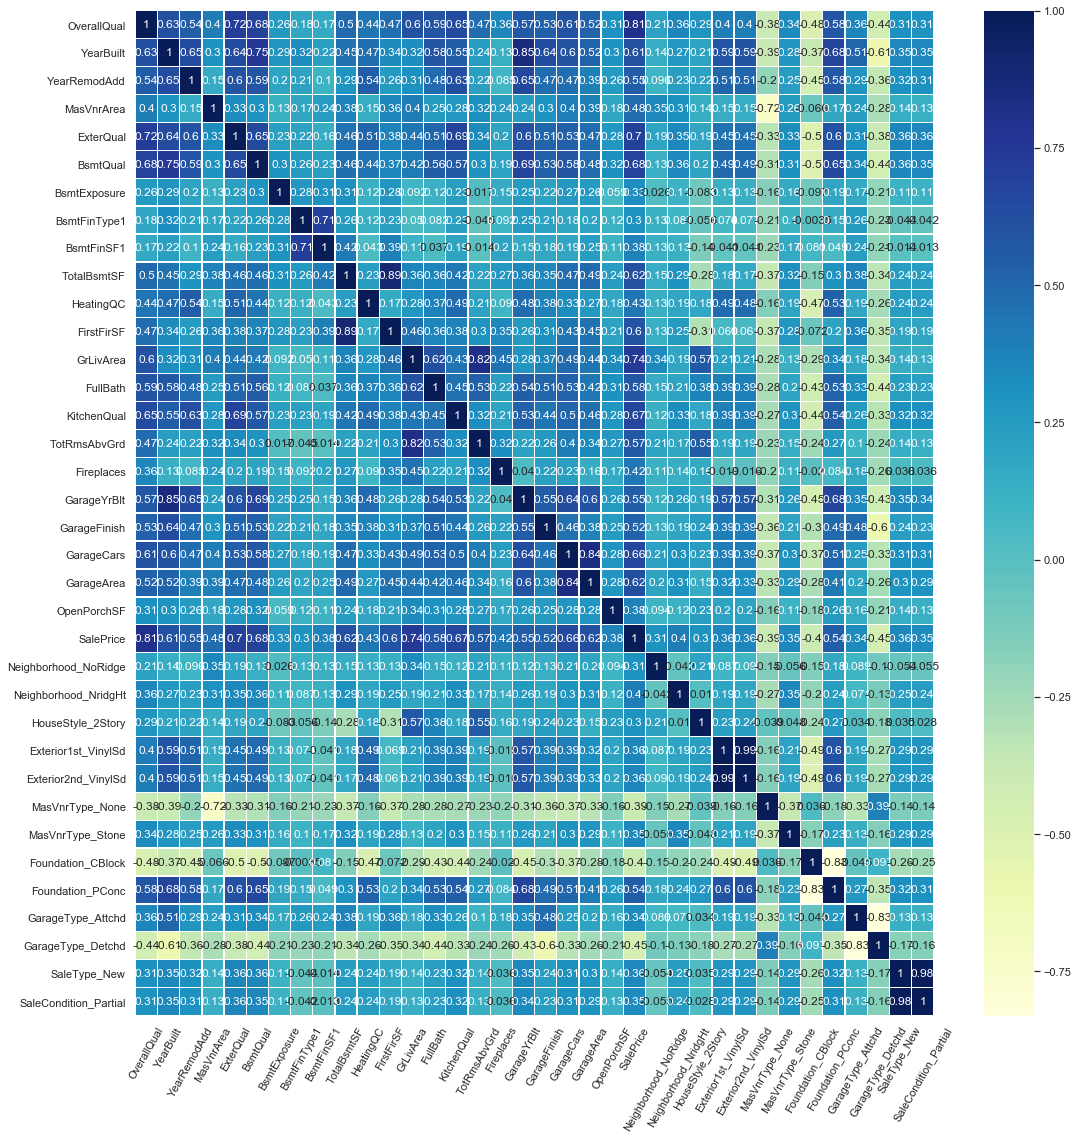

In [31]:
sns.set()
plt.figure(figsize=(16,16))
a = sns.heatmap(final_df[target_list].corr(),annot=True,linewidths=.3,cmap="YlGnBu")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

In [32]:
data = final_df[target_list]

## Analysis

  As we have discussed at the top of feature selection. After using the dummy variables, the features become impossible to plot. It is necessary to select the features that have strong or normal correlation with the target('Saleprice'). Here I used the corr() function to filter the features whose correlation values are bigger than +0.3 or smaller than -0.3, and I found that after using filter, 36 features were left, which is shown at the target_list.
    
  Those whose correlation values are between -0.3 to +0.3 are thought to be less correlated to the 'SalePrice', and thus they were removed.

# Split the data

* Before doing the standardscale and PCA, we should first split the data.

  Reference: Aegis, When to use PCA before or after a train-test split? https://www.codementor.io/@divyeshaegis/when-to-use-pca-before-or-after-a-train-test-split-vxdrlu6ci


* The cross validation will be used in model training part.

In [33]:
'''
Notice that due to the dummy transfer, the target column has been moved to the middle of column list, and 
the target column(SalePrice) do not need to be scaled.
'''

cols = list(data.columns.values) 
cols.pop(cols.index('SalePrice'))
rearrange_df = data[cols+['SalePrice']]

rearrange_df

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,TotalBsmtSF,...,Exterior2nd_VinylSd,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,GarageType_Attchd,GarageType_Detchd,SaleType_New,SaleCondition_Partial,SalePrice
0,7,2003,2003,196.0,3,3,0,5,706,856,...,1,0,0,0,1,1,0,0,0,208500
1,6,1976,1976,0.0,2,3,3,4,978,1262,...,0,1,0,1,0,1,0,0,0,181500
2,7,2001,2002,162.0,3,3,1,5,486,920,...,1,0,0,0,1,1,0,0,0,223500
3,7,1915,1970,0.0,2,2,0,4,216,756,...,0,1,0,0,0,0,1,0,0,140000
4,8,2000,2000,350.0,3,3,2,5,655,1145,...,1,0,0,0,1,1,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,7,2004,2005,0.0,3,3,0,5,410,1221,...,1,1,0,0,1,1,0,0,0,185000
1455,6,1999,2000,0.0,2,3,0,0,0,953,...,1,1,0,0,1,1,0,0,0,175000
1456,6,1978,1988,119.0,2,3,0,4,790,1542,...,0,0,1,1,0,1,0,0,0,210000
1457,7,1941,2006,0.0,4,2,0,5,275,1152,...,0,1,0,0,0,1,0,0,0,266500


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(rearrange_df.iloc[:, :-1],rearrange_df['SalePrice'],test_size=0.2, random_state=0)

# Normolization & PCA on training set

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()
scale_data = scaler.fit_transform(X_train)

In [38]:
scaled_X_train = pd.DataFrame(scale_data, index=X_train.index, columns=X_train.columns)
scaled_X_train

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,TotalBsmtSF,...,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,GarageType_Attchd,GarageType_Detchd,SaleType_New,SaleCondition_Partial
608,1.430461,-1.454394,0.597037,-0.618608,-0.759931,0.620082,0.313666,0.140342,-0.087002,-0.391304,...,-0.814659,-0.801863,0.857589,-0.326281,-0.894210,1.065954,-1.450526,-0.566947,-0.305582,-0.311884
498,-0.933761,-0.263467,0.890792,-0.052464,-0.759931,-0.865866,-0.656705,0.635823,-0.034744,-0.685250,...,-0.814659,-0.801863,-1.166059,-0.326281,-0.894210,1.065954,0.689405,-0.566947,-0.305582,-0.311884
885,2.218534,0.891371,0.694956,-0.236938,1.061147,2.106030,1.284036,1.131305,1.837036,1.741992,...,-0.814659,-0.801863,-1.166059,-0.326281,-0.894210,1.065954,0.689405,-0.566947,-0.305582,-0.311884
1254,0.642387,1.035726,0.890792,-0.033381,1.061147,0.620082,-0.656705,-1.346103,-1.103655,-1.028673,...,1.227508,1.247096,-1.166059,3.064842,-0.894210,1.065954,-1.450526,-0.566947,-0.305582,-0.311884
252,-0.145687,1.071815,0.890792,-0.618608,1.061147,0.620082,-0.656705,-1.346103,-1.103655,-0.877334,...,1.227508,1.247096,0.857589,-0.326281,-0.894210,1.065954,0.689405,-0.566947,-0.305582,-0.311884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,-0.933761,0.710928,0.450160,-0.618608,-0.759931,0.620082,-0.656705,0.635823,0.668361,-0.318545,...,1.227508,1.247096,0.857589,-0.326281,-0.894210,1.065954,-1.450526,1.763834,-0.305582,-0.311884
953,-0.933761,-0.191290,-0.822779,0.857182,-0.759931,-0.865866,1.284036,0.635823,0.231295,-0.918079,...,-0.814659,-0.801863,-1.166059,-0.326281,1.118306,-0.938126,0.689405,-0.566947,-0.305582,-0.311884
1057,0.642387,0.710928,0.401201,-0.618608,1.061147,0.620082,-0.656705,1.131305,0.309682,-0.368021,...,-0.814659,-0.801863,0.857589,-0.326281,-0.894210,1.065954,-1.450526,-0.566947,-0.305582,-0.311884
701,0.642387,-0.191290,-0.822779,0.450068,-0.759931,-0.865866,-0.656705,-1.346103,-1.103655,0.187858,...,-0.814659,-0.801863,-1.166059,-0.326281,1.118306,-0.938126,0.689405,-0.566947,-0.305582,-0.311884


##    - reduce dimensonality(PCA)

* When considering the PCA, it is necessary to choose a suitable n-components parameter. Here I choose to set n_components equals to 0.99 - as mentioned by Bartosz and Roman which will contribute to almost all of the total variance to make the lost information small.

    Reference:
    Bartosz Mikulski, PCA — how to choose the number of components?, https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/
    
    Roman Cheplyaka, Explained variance in PCA, https://ro-che.info/articles/2017-12-11-pca-explained-variance#:~:text=The%20fraction%20of%20variance%20explained,divide%20by%20the%20total%20variance.
    
    Bhavesh Bhatt, The mystery of n_components in PCA, https://medium.com/@bhattbhavesh91/the-mystery-of-n-components-in-pca-a0431ee995be

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)
pca.fit(scaled_X_train)

PCA(copy=True, iterated_power='auto', n_components=0.99, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [40]:
print('Components \n', pca.components_)

print('Explained variance \n', pca.explained_variance_)

Components 
 [[ 2.38478919e-01  2.42281517e-01  2.05314093e-01 ... -1.69629950e-01
   1.30162314e-01  1.28177602e-01]
 [ 3.40380944e-02 -4.42213363e-02 -1.29165827e-01 ... -1.28955079e-01
  -1.12355436e-01 -1.11268077e-01]
 [ 8.34163519e-02 -1.17033794e-01 -9.01535275e-02 ... -2.04272057e-02
  -2.05048039e-01 -2.10082736e-01]
 ...
 [ 9.22133177e-02 -8.38267068e-02  7.14343076e-03 ... -5.09028979e-01
  -9.21465241e-04  9.20527737e-05]
 [-9.26728614e-02 -2.91371079e-01  1.88458732e-04 ...  3.52884047e-01
  -1.91402403e-03  1.68804659e-03]
 [-6.22326319e-02 -3.16910197e-01 -8.02552340e-02 ... -3.48683821e-03
   1.74392629e-02 -3.19495877e-03]]
Explained variance 
 [12.08235657  3.14696416  2.51960985  1.93289541  1.54096669  1.35284242
  1.18659983  1.06499331  0.99961956  0.89169985  0.83490491  0.73722599
  0.68262726  0.67793352  0.60028389  0.5655391   0.51268599  0.47110652
  0.4367891   0.37455371  0.33082388  0.28670215  0.27171914  0.24254238
  0.23312916  0.21335612  0.18363297  

In [41]:
X_train_pca = pca.transform(scaled_X_train)
print("original shape:   ", scaled_X_train.shape)
print("transformed shape:", X_train_pca.shape)

original shape:    (925, 35)
transformed shape: (925, 30)


In [42]:
pca.components_.shape

(30, 35)

In [43]:
X_train_pca

array([[ 3.75162392e-01,  9.54444946e-01,  4.60037932e+00, ...,
         1.51961964e+00, -7.80495332e-01,  3.25009558e-01],
       [-1.46492469e+00, -4.60939631e-01, -1.51334726e+00, ...,
        -4.14257877e-02,  4.14470676e-02, -4.04622199e-01],
       [ 3.63232055e+00,  2.38779108e+00, -1.26677013e+00, ...,
         1.56787507e-01,  3.17413233e-01,  1.74715010e-01],
       ...,
       [ 2.01728460e+00, -6.15185937e-01,  2.87224157e+00, ...,
         4.47928228e-01, -6.06809961e-01, -2.08952893e-01],
       [-2.35825640e+00,  1.09765622e+00,  5.19580244e-02, ...,
        -2.19439161e-02, -3.25035459e-01, -1.81078578e-01],
       [-7.65609610e-01,  1.41315322e+00,  7.62626226e-01, ...,
         6.98451241e-02,  1.74636135e-01,  3.87503389e-03]])

In [44]:
n_pcs = pca.components_.shape[0]

In [45]:
import numpy as np
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
most_important_names = [scaled_X_train.columns[most_important[i]] for i in range(n_pcs)]
# dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}
print(most_important_names)
# print(dic)
print(len(most_important_names))

['YearBuilt', 'BsmtFinSF1', 'HouseStyle_2Story', 'SaleCondition_Partial', 'GarageType_Detchd', 'MasVnrArea', 'BsmtFinType1', 'GarageArea', 'Neighborhood_NoRidge', 'OpenPorchSF', 'BsmtExposure', 'OpenPorchSF', 'Neighborhood_NridgHt', 'Foundation_CBlock', 'MasVnrType_Stone', 'Neighborhood_NoRidge', 'HeatingQC', 'KitchenQual', 'GarageFinish', 'YearRemodAdd', 'FullBath', 'BsmtQual', 'KitchenQual', 'ExterQual', 'BsmtQual', 'MasVnrArea', 'HouseStyle_2Story', 'GarageType_Detchd', 'GarageCars', 'GarageYrBlt']
30


In [46]:
pca_df = pd.DataFrame(X_train_pca,columns=most_important_names)
pca_df

,YearBuilt,BsmtFinSF1,HouseStyle_2Story,SaleCondition_Partial,GarageType_Detchd,MasVnrArea,BsmtFinType1,GarageArea,Neighborhood_NoRidge,OpenPorchSF,...,FullBath,BsmtQual,KitchenQual,ExterQual,BsmtQual,MasVnrArea,HouseStyle_2Story,GarageType_Detchd,GarageCars,GarageYrBlt
0,0.375162,0.954445,4.600379,1.352546,0.900958,3.169631,0.577236,1.039163,-0.705976,-1.027333,...,1.228631,-0.252522,1.466062,-0.431270,0.705879,0.481290,0.904358,1.519620,-0.780495,0.325010
1,-1.464925,-0.460940,-1.513347,-1.747241,-0.823586,-0.854692,0.059575,1.434717,1.309168,-0.752326,...,1.007076,-0.331830,-0.438940,-0.361375,0.344745,0.225776,0.261106,-0.041426,0.041447,-0.404622
2,3.632321,2.387791,-1.266770,-1.500582,0.910450,1.586725,0.079773,0.470620,0.265601,-0.910418,...,-0.213283,0.821049,0.596489,-0.590601,-0.302603,0.999071,0.412801,0.156788,0.317413,0.174715
3,2.786398,-2.962172,1.271730,0.234662,-0.348433,-1.263087,-0.545985,1.749073,-1.192567,0.752187,...,0.154307,0.002295,-0.715995,0.197918,-0.304547,0.446738,0.319823,0.536572,-0.696743,0.144495
4,1.900805,-3.669805,0.573736,-1.587653,-0.665469,0.027859,-0.638643,-0.369331,-0.354924,-0.301088,...,0.039942,0.588453,-0.324129,0.732016,-0.495313,-0.074833,0.450436,-0.063145,0.144548,0.171533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,-0.827766,-2.397090,-2.072032,-0.738398,2.607115,-0.711375,0.205144,-0.453698,0.074954,1.437631,...,0.725903,0.084408,-0.000182,-0.140292,0.081648,0.009761,0.011378,-0.170270,-0.277452,0.099991
921,-0.151773,1.730661,2.342441,-0.644416,-1.354846,-0.671017,1.301286,-0.445021,-1.089272,1.268699,...,-0.863997,-0.095547,-0.087808,0.400053,0.016919,-0.195864,0.289649,-0.107711,0.164191,0.388275
922,2.017285,-0.615186,2.872242,-1.635140,2.063851,-0.038956,2.242403,-0.464444,3.469054,-0.991302,...,-0.420671,-0.760413,-0.668809,-0.079773,0.382344,0.670357,0.426785,0.447928,-0.606810,-0.208953
923,-2.358256,1.097656,0.051958,0.739658,-1.337750,-1.224384,-1.718065,-1.171346,-0.003470,-0.732834,...,0.034105,-0.183819,0.472486,-0.796828,-0.258273,0.747056,0.002978,-0.021944,-0.325035,-0.181079


# Data modelling - quick look

* In this part, I won't do any hyper parameter model tuning. The parameter tuning will be showed at the part5 -Hyper parameter model tuning. The reason why I used the cross_val_score is that I just want to have a quick look of different models' performance. Besides, I will do a simple comparison of PCA to see if it can increase the accuracy.

## -Linear Regression

In [47]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

reg = linear_model.LinearRegression()

scores = cross_val_score(reg, scaled_X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
rmse_scores = -scores
print('rmse_scores: ',rmse_scores)
print()
print('mean: ',rmse_scores.mean())
print()
print('standard deviation: ',rmse_scores.std())

rmse_scores:  [24496.20884425 24073.69840712 23990.78154951 23515.3362176
 21210.18071848]

mean:  23457.24114738976

standard deviation:  1165.9154683954368


## -Support Vector Machine

In [48]:
from sklearn.svm import SVR
svr = SVR()

scores = cross_val_score(svr, scaled_X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
rmse_scores = -scores
print('rmse_scores: ',rmse_scores)
print()
print('mean: ',rmse_scores.mean())
print()
print('standard deviation: ',rmse_scores.std())

rmse_scores:  [72187.15931788 68048.74885219 69622.29618024 60147.40852003
 74168.13002441]

mean:  68834.74857895044

standard deviation:  4824.759465493068


## -Random Forest Regression

In [49]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(random_state = 0)

scores = cross_val_score(regr, scaled_X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
rmse_scores = -scores
print('rmse_scores: ',rmse_scores)
print()
print('mean: ',rmse_scores.mean())
print()
print('standard deviation: ',rmse_scores.std())

rmse_scores:  [25630.1691542  25019.07050514 24538.10655    25192.16696963
 24638.52211664]

mean:  25003.607059122893

standard deviation:  394.5508221294471


## -K nearest neighbour regression

In [50]:
from sklearn import neighbors 
knn = neighbors.KNeighborsRegressor()

scores = cross_val_score(knn, scaled_X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
rmse_scores = -scores
print('rmse_scores: ',rmse_scores)
print()
print('mean: ',rmse_scores.mean())
print()
print('standard deviation: ',rmse_scores.std())

rmse_scores:  [32142.18815685 29006.61179394 32235.60431217 27627.71862805
 30124.51351923]

mean:  30227.327282050323

standard deviation:  1786.5358057546184


## -A Simple comparison of whether PCA increase accuracy - using linear_model

* Transform the X_test into correlated PCA or StandardScale stype.

In [51]:
from sklearn.metrics import mean_squared_error

reg.fit(scaled_X_train, y_train)
pred_without_pca_y = reg.predict(scaler.transform(X_test))
no_pca_RSME = mean_squared_error(y_test, pred_without_pca_y)
no_pca_RSME = np.sqrt(no_pca_RSME)
print('The RSME of not-tuning linear model without using PCA is:',no_pca_RSME)

reg.fit(pca_df, y_train)
pred_pca_y = reg.predict(pca.transform(X_test))
pca_RSME = mean_squared_error(y_test, pred_pca_y)
pca_RSME = np.sqrt(pca_RSME)
print('The RSME of not-tuning linear model with using PCA is:',pca_RSME)

The RSME of not-tuning linear model without using PCA is: 24232.371474744
The RSME of not-tuning linear model with using PCA is: 44982895.93709494


## -A Simple comparison of whether PCA increase accuracy - using SVR

In [52]:
svr.fit(scaled_X_train, y_train)
pred_without_pca_y = svr.predict(scaler.transform(X_test))
no_pca_RSME = mean_squared_error(y_test, pred_without_pca_y)
no_pca_RSME = np.sqrt(no_pca_RSME)
print('The RSME of not-tuning SVR model without using PCA is:',no_pca_RSME)

svr.fit(pca_df, y_train)
pred_pca_y = svr.predict(pca.transform(X_test))
pca_RSME = mean_squared_error(y_test, pred_pca_y)
pca_RSME = np.sqrt(pca_RSME)
print('The RSME of not-tuning SVR model with using PCA is:',pca_RSME)

The RSME of not-tuning SVR model without using PCA is: 69148.79693849271
The RSME of not-tuning SVR model with using PCA is: 69192.39353615766


## -Conclusion

* Through the quick look of RSME, I found that the linear regression performance better and the SVM performance worse than others. I will make a futher comparision after tuning model. 
 
  What's more, the PCA seems didn't increase the accuracy of the model.
  
  The reason of the poor performance of PCA in this project is maybe that I have done a lot of works to reduce the dimension of features, and the remaining features all have a high correlation with sale price, so if I do the PCA among those high-relation features, then I would probably lose important features, which will has a negative affect on my results.

# Hyperparameter model tuning

In [53]:
from sklearn.model_selection import GridSearchCV

## -Linear Regression

In [54]:
reg = linear_model.LinearRegression()

parameters = {'fit_intercept': ['True','False'],\
              'normalize':['True','False'],\
              'n_jobs' : [1,2,-1]}
gs_reg = GridSearchCV(reg, parameters, cv=5)
gs_reg.fit(scaled_X_train,y_train)
gs_reg_y = gs_reg.predict(scaler.transform(X_test))

scores = cross_val_score(gs_reg, scaled_X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
rmse_scores = -scores
print()
print('The cross validation score with trained model is:')
print('rmse_scores: ',rmse_scores)
print()
print('mean_rmse: ',rmse_scores.mean())
print()
print('standard deviation: ',rmse_scores.std())

gs_n_RSME = mean_squared_error(y_test, gs_reg_y)
gs_reg_RSME = np.sqrt(gs_n_RSME)
print()
print('After tuning, the best parameters are:',gs_reg.best_params_)
print('              the RSME of the model is:',gs_reg_RSME)


The cross validation score with trained model is:
rmse_scores:  [24496.20884425 24073.69840712 23990.78154951 23515.3362176
 21210.18071848]

mean_rmse:  23457.241147389763

standard deviation:  1165.9154683954373

After tuning, the best parameters are: {'fit_intercept': 'True', 'n_jobs': 1, 'normalize': 'True'}
              the RSME of the model is: 24232.371474744


## -Support Vector Machine

In [55]:
svr = SVR(C=1.0, 
          kernel='rbf',
          gamma='scale', 
          tol=0.001,  
          max_iter=-1)



parameters = {'gamma': ['scale', 'auto'],\
              'epsilon':[0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1,10],\
              'kernel':['linear','rbf'],\
              'C' : [0.1, 1, 10, 100, 500, 1000, 2000]}
gs_svr = GridSearchCV(svr, parameters, cv=5)
gs_svr.fit(scaled_X_train,y_train)
gs_svr_y = gs_svr.predict(scaler.transform(X_test))

scores = cross_val_score(gs_svr, scaled_X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
rmse_scores = -scores
print()
print('The cross validation score with trained model is:')
print('rmse_scores: ',rmse_scores)
print()
print('mean_rmse: ',rmse_scores.mean())
print()
print('standard deviation: ',rmse_scores.std())

gs_n_RSME = mean_squared_error(y_test, gs_svr_y)
gs_svr_RSME = np.sqrt(gs_n_RSME)
print()
print('After first tuning, the best parameters are:',gs_svr.best_params_)
print('                    the RSME of the model is:',gs_svr_RSME)


The cross validation score with trained model is:
rmse_scores:  [25310.30927357 24705.16735487 25412.04450584 22906.44133177
 21908.79958802]

mean_rmse:  24048.552410814547

standard deviation:  1397.515231987389

After first tuning, the best parameters are: {'C': 1000, 'epsilon': 1e-06, 'gamma': 'scale', 'kernel': 'linear'}
                    the RSME of the model is: 23635.400641839497


## -Random Forest Regression

* The min_samples_leaf can be searched based on empirical value from 1 to 20 [1].


[1] Rafael Gomes Mantovani, Tomáš Horváth, Ricardo Cerri, Sylvio Barbon Junior, Joaquin Vanschoren, André Carlos Ponce de Leon Ferreira de Carvalho, "An empirical study on hyperparameter tuning of decision trees": https://arxiv.org/abs/1812.02207

In [56]:
regr = RandomForestRegressor(random_state = 0,
                             max_depth=None,
                             min_samples_leaf = 1,
                             min_samples_split=2,
                             min_weight_fraction_leaf=0.0,
                             max_features='auto',
                             max_leaf_nodes=None, 
                             min_impurity_decrease=0.0, 
                             min_impurity_split=None,
                             criterion='mse')

parameters = {'n_estimators': [10, 50, 100, 150],\
              'min_samples_leaf':list(range(1,20)),\
              'criterion' : ['mse'],
              'min_samples_split':[2,4,6,8]}
gs_regr = GridSearchCV(regr, parameters, cv=5)
gs_regr.fit(scaled_X_train,y_train)
gs_regr_y = gs_regr.predict(scaler.transform(X_test))

scores = cross_val_score(gs_regr, scaled_X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
rmse_scores = -scores
print()
print('The cross validation score with trained model is:')
print('rmse_scores: ',rmse_scores)
print()
print('mean_rmse: ',rmse_scores.mean())
print()
print('standard deviation: ',rmse_scores.std())

gs_n_RSME = mean_squared_error(y_test, gs_regr_y)
gs_regr_RSME = np.sqrt(gs_n_RSME)
print()
print('After tuning, the best parameters are:',gs_regr.best_params_)
print('              the RSME of the model is:',gs_regr_RSME)


The cross validation score with trained model is:
rmse_scores:  [25401.03265018 24472.88775959 24538.10655    25159.99626537
 24510.78952282]

mean_rmse:  24816.562549591927

standard deviation:  386.96234041545154

After tuning, the best parameters are: {'criterion': 'mse', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
              the RSME of the model is: 24863.958439657326


## -K nearest neighbour regression

In [57]:
knn = neighbors.KNeighborsRegressor(n_neighbors=5,
                                    weights = 'uniform',
                                    algorithm = 'auto',
                                    leaf_size = 30)

parameters = {'n_neighbors': [1, 3, 5, 7, 9, 11],\
              'weights':['uniform','distance'],\
              'algorithm' : ['auto','ball_tree','kd_tree','brute'],
              'leaf_size':[10,20,30,40,50,60,70,80]}
gs_knn = GridSearchCV(knn, parameters, cv=5)
gs_knn.fit(scaled_X_train,y_train)
gs_knn_y = gs_knn.predict(scaler.transform(X_test))

scores = cross_val_score(gs_knn, scaled_X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
rmse_scores = -scores
print()
print('The cross validation score with trained model is:')
print('rmse_scores: ',rmse_scores)
print()
print('mean_rmse: ',rmse_scores.mean())
print()
print('standard deviation: ',rmse_scores.std())

gs_n_RSME = mean_squared_error(y_test, gs_knn_y)
gs_knn_RSME = np.sqrt(gs_n_RSME)
print()
print('After tuning, the best parameters are:',gs_knn.best_params_)
print('              the RSME of the model is:',gs_knn_RSME)


The cross validation score with trained model is:
rmse_scores:  [31946.91114728 28994.93289848 31690.74907879 26759.55033988
 30293.40887811]

mean_rmse:  29937.110468508745

standard deviation:  1909.245015447906

After tuning, the best parameters are: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 9, 'weights': 'distance'}
              the RSME of the model is: 27141.229194839754


# Model Performance – Evaluation

 ## -Calculate the baseline and compare the RSME

In [58]:
baseline = y_train.mean()
y_baseline = np.repeat(baseline, len(y_test))

naive_RSME = mean_squared_error(y_test, y_baseline)
naive_RSME = np.sqrt(naive_RSME)
print()
print('         Naive_RSME:',naive_RSME)
print('         Linear_RSME:',gs_reg_RSME)
print('         SVR_RSME:',gs_svr_RSME)
print('         RandomForest_RSME:',gs_regr_RSME)
print('         Knearest_RSME:',gs_knn_RSME)


         Naive_RSME: 67976.56263485909
         Linear_RSME: 24232.371474744
         SVR_RSME: 23635.400641839497
         RandomForest_RSME: 24863.958439657326
         Knearest_RSME: 27141.229194839754


## -Plotting the points

### (1) y_test values of linear regression & y_test values

Text(0.5, 0, 'Linear Regression')

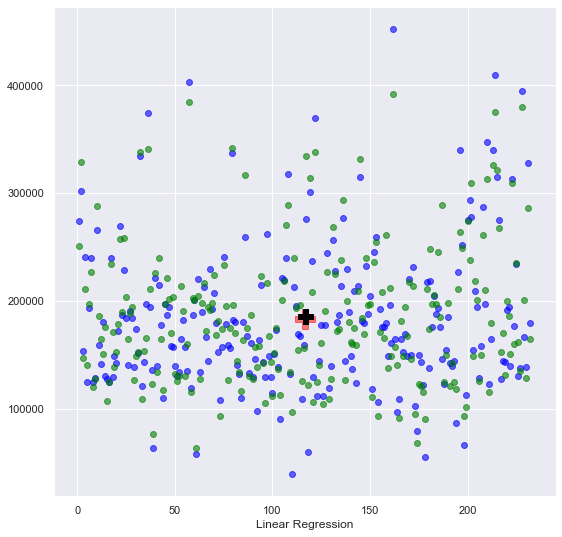

In [59]:
# prepare to use the plt.scatter, x is the index of the y_test, y is the corresponded value(y_test or y_predict). 
plt.figure(figsize=(9,9))
index_list = [i for i in range(1,len(y_test)+1)]

plt.scatter(index_list,y_test,color='Blue',alpha=0.6)
plt.plot((len(y_test)+1)/2,y_test.mean(),marker='P', markersize=20, color="red",alpha=0.5)

plt.scatter(index_list,gs_reg_y,color='Green',alpha=0.6)
plt.plot((len(y_test)+1)/2,gs_reg_y.mean(),marker='P', markersize=15, color="black")
plt.xlabel('Linear Regression')

### (2) y_test values of SVR regression & y_test values

Text(0.5, 0, 'SVR')

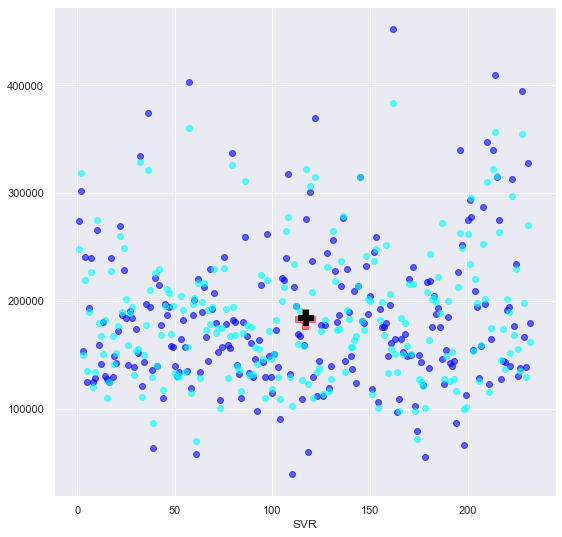

In [60]:
plt.figure(figsize=(9,9))
plt.scatter(index_list,y_test,color='Blue',alpha=0.6)
plt.plot((len(y_test)+1)/2,y_test.mean(),marker='P', markersize=20, color="red",alpha=0.5)

plt.scatter(index_list,gs_svr_y,color='Cyan',alpha=0.6)
plt.plot((len(y_test)+1)/2,gs_svr_y.mean(),marker='P', markersize=15, color="black")
plt.xlabel('SVR')

### (3) y_test values of RandomForest regression & y_test values

Text(0.5, 0, 'RandomForest')

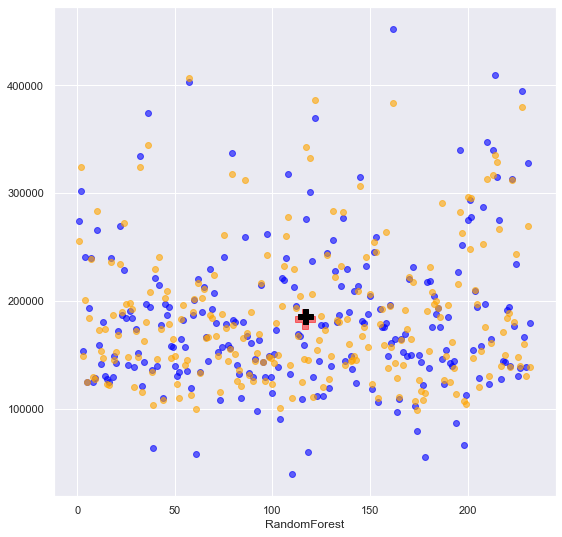

In [61]:
plt.figure(figsize=(9,9))
plt.scatter(index_list,y_test,color='Blue',alpha=0.6)
plt.plot((len(y_test)+1)/2,y_test.mean(),marker='P', markersize=20, color="red",alpha=0.5)

plt.scatter(index_list,gs_regr_y,color='Orange',alpha=0.6)
plt.plot((len(y_test)+1)/2,gs_regr_y.mean(),marker='P', markersize=15, color="black")
plt.xlabel('RandomForest')

### (4) y_test values of KNN regression & y_test values

Text(0.5, 0, 'RandomForest')

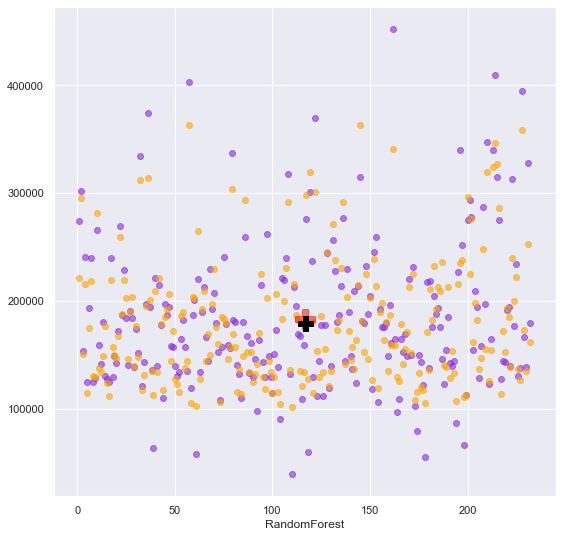

In [62]:
plt.figure(figsize=(9,9))
plt.scatter(index_list,y_test,color='Blueviolet',alpha=0.6)
plt.plot((len(y_test)+1)/2,y_test.mean(),marker='P', markersize=20, color="red",alpha=0.5)

plt.scatter(index_list,gs_knn_y,color='Orange',alpha=0.6)
plt.plot((len(y_test)+1)/2,gs_knn_y.mean(),marker='P', markersize=15, color="black")
plt.xlabel('RandomForest')

## -Evaluation

   Comparing the four RSME values, we can find that K nearest neighbour regression model performs worse than the other three model, because it has the largest RSME among the four tuning model. Meanwhile, the linear regression model, SVR model and RandomForest model have the similar RSME value.
   
   However, when we take a look at the standard deviation(SD) of the remaining three model, we can find that both the linear regression and SVR have a SD value bigger than 1000, while that value of RandomForest model is no more than 500. It implies that the RandomForest regression model performs more steady.
   
   Therefore, the best model among those four models is RandomForest regression model based on this house price dataset.

# Save the Model for a future use

* As we have discussed, although the RSME of SVR is slightly smaller than the RandomForest, but the RandomForest model has a greater standard deviation performance when looking at the cross validation. So, I choose RandomForest model as my final model to save and use.

In [63]:
import pickle

pkl_filename = "project_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(gs_regr, file)


with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
score = pickle_model.score(scaler.transform(X_test), y_test)
print("Test score: {0:.2f} %".format(100 * score))
y_predict = pickle_model.predict(scaler.transform(X_test))
y_predict

Test score: 86.62 %


array([255498.78301587, 324700.58710582, 149221.17071429, 200817.47768254,
       125108.70504762, 184884.07460317, 239426.03045503, 129682.30488889,
       127836.83230159, 283828.60749471, 173279.13107937, 154427.28496104,
       147557.2215873 , 174286.49661376, 123739.92248677, 122494.73626984,
       236435.3854127 , 186974.3468254 , 146009.59917989, 153014.7681746 ,
       169054.2265873 , 234906.11368783, 190152.7625873 , 272414.76446032,
       197390.92921164, 148142.66693122, 198517.04624339, 192749.62822751,
       120702.13430952, 172595.28425397, 148176.8847619 , 324711.95602116,
       116319.70412698, 163056.55753968, 180925.06804233, 344489.34921958,
       209018.16198413, 134366.78910053, 104358.64633862, 230141.35830688,
       146968.41095238, 241422.36473016, 174306.34222222, 108448.73084127,
       203301.12529101, 209730.92066138, 178564.16212698, 147283.36050794,
       164888.88324868, 149153.34766667, 123396.68650794, 110384.55571429,
       183464.66913757, 1